In [1]:
from extract_center import CenterExtracter
import matplotlib.pyplot as plt
plt.rcdefaults()
from scipy.interpolate import interp1d
import peakutils
import numpy as np

In [2]:
c = CenterExtracter()

In [3]:
img = c._read_image_("34.jpg")
img = c._subtract_image_(img)
img = c._crop_(img, 0, 0, 500, 500)

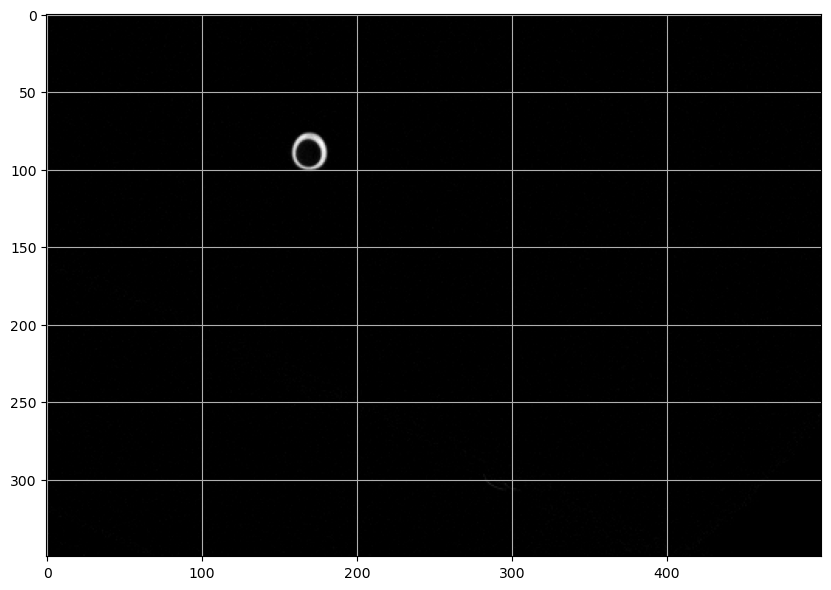

In [4]:
c._show_image_(img)

In [6]:
c.image_final

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 2.],
       [0., 0., 0., ..., 0., 2., 2.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
row = 90
row_values = img[row, :]
row_values

array([  0.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
         2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
         1.,   3.,   2.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,   0.,   0.,
         2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   3.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         2.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
         0.,   0.,   2.,   0.,   0.,   1.,   0.,   

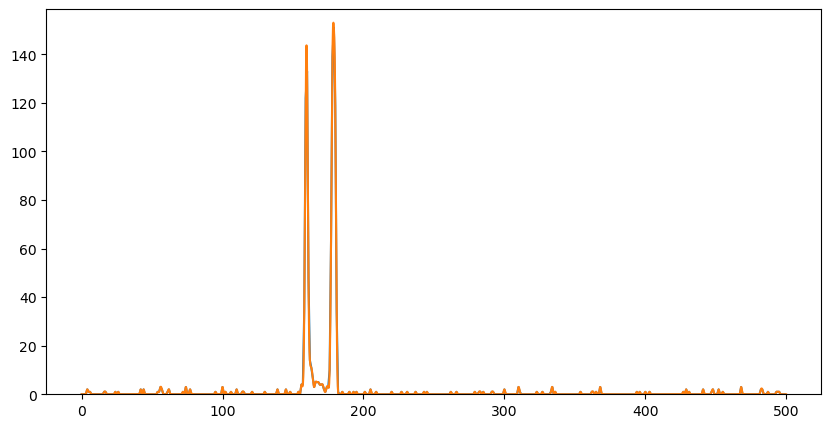

In [23]:
row = 90
row_values = img[row, :]
inter = interp1d(range(len(row_values)), row_values, kind='cubic', bounds_error=False, fill_value=0)
x = np.arange(0, len(row_values), 0.1)
y = inter(x)
plt.figure(figsize=(10, 5))
plt.plot(row_values)
plt.plot(x, y)
plt.ylim(0, row_values.max()+row_values.max()*0.05)
plt.show()

In [26]:
peakutils.indexes(y)/10, peakutils.indexes(row_values)

(array([159.6, 178.7]), array([160, 179], dtype=int64))

In [33]:
diff = np.diff(y)
diff.argmax()

1585

In [34]:
diff = np.diff(row_values)
diff.argmax()

158